<a href="https://colab.research.google.com/github/knkarthik01/nystagmus-photosensitivity-ai/blob/main/notebooks/3_explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 3_Explainability.ipynb

Apply SHAP to understand model predictions on Photosensitivity Risk.

In [1]:
# Step 1: Import libraries
import torch
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Step 2: Load preprocessed data
# Make sure preprocessed_data.csv exists in your environment!
data = pd.read_csv('preprocessed_data.csv')

X = data[['brightness_level', 'eye_movement_variance']].values
y = data['photosensitivity_risk'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [5]:
# Step 3: Define and load the model
class DualBranchNet(torch.nn.Module):
    def __init__(self):
        super(DualBranchNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, 16)
        self.fc2 = torch.nn.Linear(16, 8)
        self.fc3 = torch.nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize and load trained weights
model = DualBranchNet()
model.load_state_dict(torch.load('dual_branch_cnn.pth'))
model.eval()

DualBranchNet(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-7-ad12ebaecc3e>:16: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_np[:100], feature_names=['brightness_level', 'eye_movement_variance'])
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 640x480 with 0 Axes>

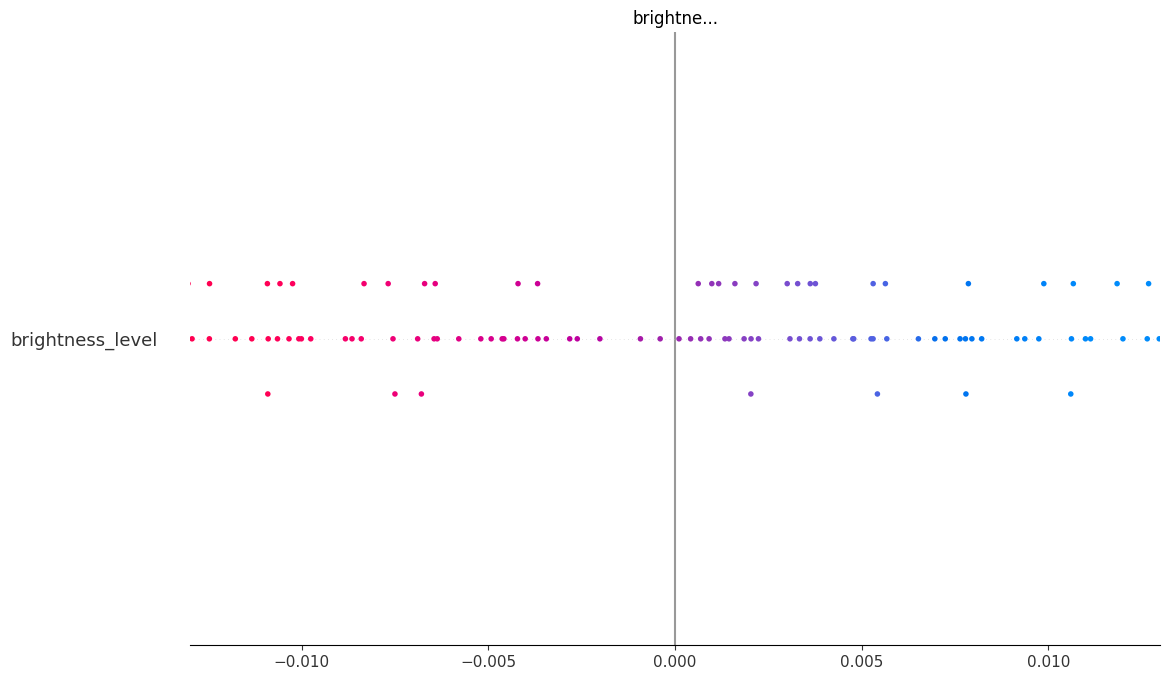

In [7]:
# Step 4: Apply SHAP explainability
# Convert torch tensor to numpy
X_test_np = X_test_tensor.detach().numpy()

# Define a simple prediction function for SHAP
def predict_fn(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        return model(x_tensor).numpy()

# Use KernelExplainer
explainer = shap.KernelExplainer(predict_fn, X_test_np[:50])  # Use a small background set for speed
shap_values = explainer.shap_values(X_test_np[:100])          # Explain 100 samples

# Plot
shap.summary_plot(shap_values, X_test_np[:100], feature_names=['brightness_level', 'eye_movement_variance'])


## 🎯 Great Job!

You've now:
- Loaded your model
- Applied SHAP Explainability
- Visualized how brightness and eye movements contribute to risk prediction!

Next ideas:
- Try GradCAM if you add image-based branches.
- Perform SHAP value analysis on more complex datasets.